In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

In [ ]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
# yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
# yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
# yaml_path = "config/mcts_smirks.yaml"
# yaml_path = "config/mcts_jensen.yaml"
# yaml_path = "config/heapq_smiles.yaml"
yaml_path = "config/mol_opt/_test.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

seed: 1752726689
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.5520, node: CNS(=O)(=O)c1ccc2c(N)c(C(=O)OCC(=O)N3CCc4ncccc4C3)sc2c1
<Best reward updated> 2 - time: 0.05, reward: 0.6008, node: O=C(NC(=S)Nc1ccc(Cl)c(Cl)c1)c1c[nH]c2ncccc12
<Best reward updated> 3 - time: 0.06, reward: 0.6811, node: Nc1ccc(C(=O)c2cc(F)cc(Br)c2)cc1
<Best reward updated> 5 - time: 0.09, reward: 0.8218, node: Br[C@@H](CN1CC[NH+](Cc2ccccn2)CC1)c1ccccc1
<Best reward updated> 9 - time: 0.12, reward: 0.8971, node: O=C(Cc1ccccc1Cl)N1CCC[C@@H]1c1[nH]ncc1Br
<Best reward updated> 37 - time: 0.43, reward: 0.9046, node: Brc1cnn(CC[NH2+]C23CC4CC(CC(C4)C2)C3)c1
<Best reward updated> 41 - time: 0.46, reward: 0.9310, node: Brc1nnc(NC[C@@H]2CCCO2)c(-c2ccccc2)n1
<Best reward updated> 77 - time: 0.80, reward: 0.9455, node: Clc1cnccc1CNc1nsc[n+]1Br
100 - time: 0.96, average over 100: 0.7145
200 - time: 1.86, average over 100: 0.7296
300 - time: 2.90, average over 100: 0.7345


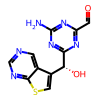

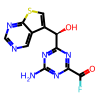

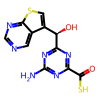

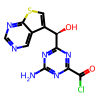

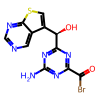

In [4]:
from utils import draw_mol
for c in generator.root.children:
    draw_mol(c.mol(), 100, 100)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)